In [1]:
import lib.mb as mb
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
from pyarrow import parquet as pq, Table as pt

In [2]:
%%time
MB_track = mb.get_tracks()

/home/snaek/MLHD/env_mlhd/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


CPU times: user 9.8 s, sys: 4.14 s, total: 13.9 s
Wall time: 26.6 s


In [3]:
# stat_table = {'snap': None, 'zstd': None, 'zstd10': None}
stat_table = {'start_r': [], 'end_r': [], 'start_w': [], 'end_w': [], 'size': []}

### 1. Snappy

In [4]:
%%time
# write to snappy parquet
stat_table['start_w'].append(time.monotonic())

path_snap = "unk_ids/MB_tables/MB_track.snappy.parquet"
MB_track.to_parquet(path_snap, compression='snappy')

stat_table['end_w'].append(time.monotonic())

CPU times: user 6.84 s, sys: 2.37 s, total: 9.21 s
Wall time: 16.1 s


In [5]:
%%time 
# read from snappy parquet
stat_table['start_r'].append(time.monotonic())

_ = pd.read_parquet(path_snap)

stat_table['end_r'].append(time.monotonic())

CPU times: user 11.9 s, sys: 4.26 s, total: 16.2 s
Wall time: 15.9 s


In [6]:
stat_table['size'].append(os.path.getsize(path_snap)/(1024*1024))

### 2. ZSTD

In [7]:
%%time
# to snappy parquet

stat_table['start_w'].append(time.monotonic())

path_zstd = "unk_ids/MB_tables/MB_track.zstd.parquet"
MB_track_pt = pt.from_pandas(MB_track)
pq.write_table(MB_track_pt, path_zstd, compression='zstd')

stat_table['end_w'].append(time.monotonic())

CPU times: user 7.05 s, sys: 999 ms, total: 8.05 s
Wall time: 11.4 s


In [8]:
%%time 
stat_table['start_r'].append(time.monotonic())

_ = pd.read_parquet(path_zstd)

stat_table['end_r'].append(time.monotonic())

CPU times: user 12 s, sys: 5.26 s, total: 17.3 s
Wall time: 16.9 s


In [9]:
stat_table['size'].append(os.path.getsize(path_zstd)/(1024*1024))

### 3. zstd10

In [10]:
%%time
# to snappy parquet

stat_table['start_w'].append(time.monotonic())

path_zstd10 = "unk_ids/MB_tables/MB_track.zstd10.parquet"
MB_track_pt = pt.from_pandas(MB_track)
pq.write_table(MB_track_pt, path_zstd10, compression='zstd', compression_level=10)

stat_table['end_w'].append(time.monotonic())

CPU times: user 53.7 s, sys: 1.12 s, total: 54.8 s
Wall time: 55.8 s


In [11]:
%%time

stat_table['start_r'].append(time.monotonic())

_ = pd.read_parquet(path_zstd10)

stat_table['end_r'].append(time.monotonic())

CPU times: user 12.9 s, sys: 4.23 s, total: 17.1 s
Wall time: 16.9 s


In [12]:
stat_table['size'].append(os.path.getsize(path_zstd10)/(1024*1024))

# Matplotlib

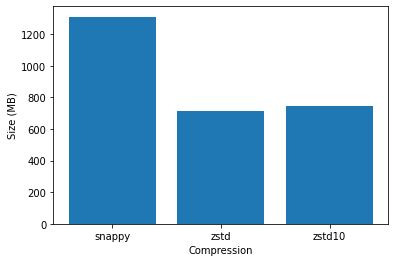

In [21]:
# fig, sizex = plt.subplots()
plt.bar(['snappy', 'zstd', 'zstd10'], [stat_table['size'][0], stat_table['size'][1], stat_table['size'][2]])
plt.xlabel('Compression')
plt.ylabel('Size (MB)')

plt.show()

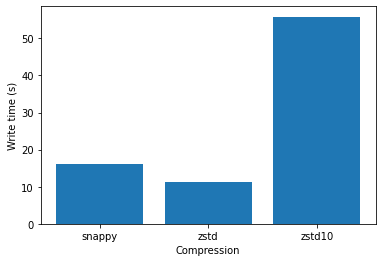

In [15]:
plt.bar(['snappy', 'zstd', 'zstd10'], [stat_table['end_w'][0]-stat_table['start_w'][0], stat_table['end_w'][1]-stat_table['start_w'][1], stat_table['end_w'][2]-stat_table['start_w'][2]])
plt.xlabel('Compression')
plt.ylabel('Write time (s)')
plt.show()

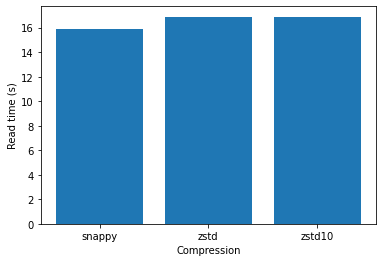

In [16]:
plt.bar(['snappy', 'zstd', 'zstd10'], [stat_table['end_r'][0]-stat_table['start_r'][0], stat_table['end_r'][1]-stat_table['start_r'][1], stat_table['end_r'][2]-stat_table['start_r'][2]])
plt.xlabel('Compression')
plt.ylabel('Read time (s)')
plt.show()